In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
Customers = pd.read_csv("/content/Customers.csv")

In [68]:
Subscriptions = pd.read_csv("/content/Subscription.csv")

In [69]:
Transactions = pd.read_csv("/content/Transcation.csv")

In [70]:
Usage = pd.read_csv("/content/Usage.csv")

In [71]:
merged_df = pd.merge(Customers, Subscriptions, on="CustomerID", how="left")


In [72]:
merged_df = merged_df.merge(Transactions, on="CustomerID", how="left")

In [73]:
merged_df = merged_df.merge(Usage, on="CustomerID", how="left")

In [74]:
# Check for non-datetime values
print(merged_df[["StartDate", "EndDate"]].dtypes)

# Look for rows with invalid dates
print(merged_df[merged_df["StartDate"].isna() | merged_df["EndDate"].isna()])


StartDate    object
EndDate      object
dtype: object
    CustomerID              Name  Age  Gender  Income            Location  \
0            1       Karan Reddy   29    Male   40000           Hyderabad   
2            3          Diya Das   28  Female   60000             Chennai   
7            5        Suman Iyer   30  Female   50000              Mumbai   
9            7      Aditya Ghosh   27    Male   42000             Kolkata   
11           9     Rajesh Sharma   38    Male   61000               Noida   
12           9     Rajesh Sharma   38    Male   61000               Noida   
16          11  Vivaan Choudhary   26    Male   45000              Bhopal   
18          13      Vikram Verma   37    Male   57000          Chandigarh   
19          13      Vikram Verma   37    Male   57000          Chandigarh   
21          15       Aditi Patel   28  Female   62000           Ahmedabad   
22          15       Aditi Patel   28  Female   62000           Ahmedabad   
24          17       S

In [75]:
print(merged_df.columns)

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Income', 'Location',
       'SubscriptionID', 'StartDate', 'EndDate', 'Status', 'transaction_id',
       'transaction_date', 'amount', 'transaction_type', 'usage_id',
       'feature_used', 'usage_date', 'usage_amount'],
      dtype='object')


In [76]:
merged_df["StartDate"] = pd.to_datetime(merged_df["StartDate"], errors="coerce")
merged_df["EndDate"] = pd.to_datetime(merged_df["EndDate"], errors="coerce")
merged_df["tenure"] = (merged_df["EndDate"] - merged_df["StartDate"]).dt.days


In [77]:
print(merged_df[["StartDate", "EndDate", "tenure"]].head())

   StartDate    EndDate  tenure
0 2022-01-31        NaT     NaN
1 2022-02-28 2024-11-21   997.0
2 2022-03-31        NaT     NaN
3 2022-04-30 2024-11-21   936.0
4 2022-04-30 2024-11-21   936.0


In [78]:
# Avoid division by zero by replacing tenure of 0 with NaN
merged_df["tenure"] = merged_df["tenure"].replace(0, np.nan)

# Calculate average monthly spend
merged_df["average_monthly_spend"] = merged_df["amount"] / (merged_df["tenure"] / 30.0)

# Fill NaN values in 'average_monthly_spend' if any tenure is missing or invalid
merged_df["average_monthly_spend"].fillna(0, inplace=True)


<ipython-input-78-fca80104520c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["average_monthly_spend"].fillna(0, inplace=True)


In [79]:
print(merged_df.columns)


Index(['CustomerID', 'Name', 'Age', 'Gender', 'Income', 'Location',
       'SubscriptionID', 'StartDate', 'EndDate', 'Status', 'transaction_id',
       'transaction_date', 'amount', 'transaction_type', 'usage_id',
       'feature_used', 'usage_date', 'usage_amount', 'tenure',
       'average_monthly_spend'],
      dtype='object')


In [80]:
print(merged_df.head())


   CustomerID             Name  Age  Gender  Income   Location SubscriptionID  \
0           1      Karan Reddy   29    Male   40000  Hyderabad        SUB0001   
1           2      Anaya Joshi   35  Female   55000  Bangalore        SUB0002   
2           3         Diya Das   28  Female   60000    Chennai        SUB0003   
3           4  Siddharth Reddy   32    Male   45000      Delhi        SUB0004   
4           4  Siddharth Reddy   32    Male   45000      Delhi        SUB0004   

   StartDate    EndDate Status transaction_id transaction_date  amount  \
0 2022-01-31        NaT    Yes            NaN              NaN     NaN   
1 2022-02-28 2024-11-21     No       e183937c       2024-10-01   13.92   
2 2022-03-31        NaT    Yes            NaN              NaN     NaN   
3 2022-04-30 2024-11-21     No       ce657026       2024-06-05   17.95   
4 2022-04-30 2024-11-21     No       ce657026       2024-06-05   17.95   

  transaction_type  usage_id      feature_used  usage_date  usage_am

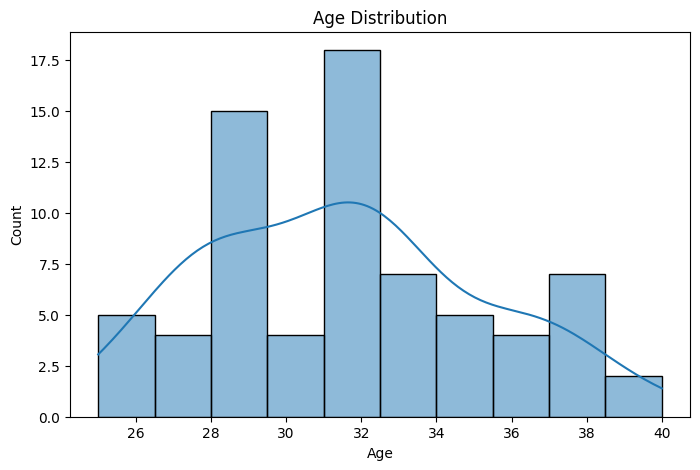

In [81]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

Index(['CustomerID', 'SubscriptionID', 'StartDate', 'EndDate', 'Status'], dtype='object')


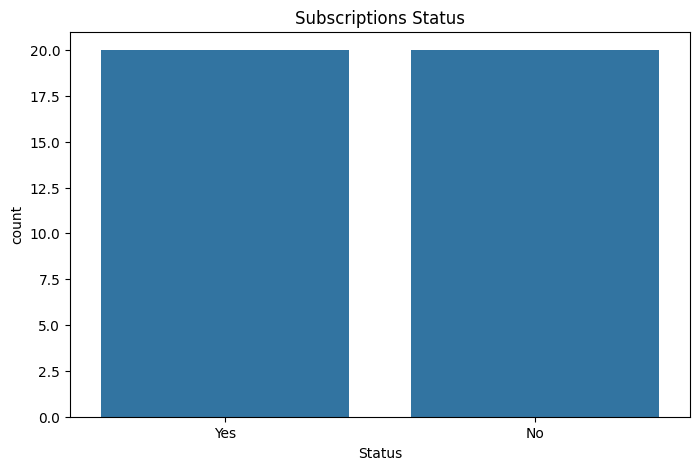

In [89]:
Subscriptions = pd.read_csv("/content/Subscription.csv")
print(Subscriptions.columns)
plt.figure(figsize=(8, 5))
sns.countplot(x="Status", data=Subscriptions)
plt.title("Subscriptions Status")
plt.show()

In [90]:
print(Subscriptions.columns)


Index(['CustomerID', 'SubscriptionID', 'StartDate', 'EndDate', 'Status'], dtype='object')


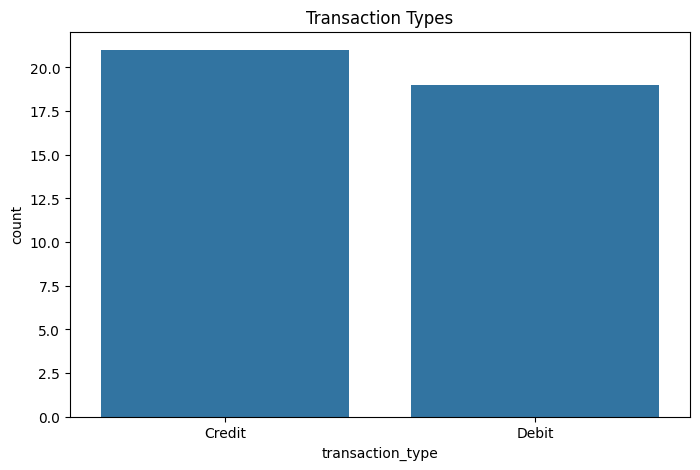

In [93]:
plt.figure(figsize=(8, 5))
sns.countplot(x="transaction_type", data=Transactions)
plt.title("Transaction Types")
plt.show()

In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Print columns to inspect available ones
print(merged_df.columns)

# Apply label encoding with correct column names
merged_df["Gender"] = LabelEncoder().fit_transform(merged_df["Gender"])
merged_df["Location"] = LabelEncoder().fit_transform(merged_df["Location"])

# Use the correct column names based on your DataFrame
merged_df["SubscriptionID"] = LabelEncoder().fit_transform(merged_df["SubscriptionID"])  # If you need to encode SubscriptionID
merged_df["transaction_type"] = LabelEncoder().fit_transform(merged_df["transaction_type"])  # Encoding for transaction_type


Index(['CustomerID', 'Name', 'Age', 'Gender', 'Income', 'Location',
       'SubscriptionID', 'StartDate', 'EndDate', 'Status', 'transaction_id',
       'transaction_date', 'amount', 'transaction_type', 'usage_id',
       'feature_used', 'usage_date', 'usage_amount', 'tenure',
       'average_monthly_spend'],
      dtype='object')


In [101]:
# Check column names to make sure 'churned' is present
print(merged_df.columns)

# If 'churned' column doesn't exist, create it
if 'churned' not in merged_df.columns:
    merged_df["churned"] = (merged_df["Status"] == "Churned").astype(int)

# Define features and target variable
features = ["Age", "Gender", "Income", "tenure", "average_monthly_spend"]
X = merged_df[features]
y = merged_df["churned"]


Index(['CustomerID', 'Name', 'Age', 'Gender', 'Income', 'Location',
       'SubscriptionID', 'StartDate', 'EndDate', 'Status', 'transaction_id',
       'transaction_date', 'amount', 'transaction_type', 'usage_id',
       'feature_used', 'usage_date', 'usage_amount', 'tenure',
       'average_monthly_spend'],
      dtype='object')


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [104]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in X
X_imputed = imputer.fit_transform(X)

# Perform clustering on the cleaned data
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df["segment"] = kmeans.fit_predict(X_imputed)

# Analyze clusters
for segment in merged_df["segment"].unique():
    print(merged_df[merged_df["segment"] == segment].describe())


       CustomerID        Age     Gender        Income   Location  \
count   23.000000  23.000000  23.000000     23.000000  23.000000   
mean    18.000000  31.217391   0.826087  44521.739130  19.347826   
min      1.000000  26.000000   0.000000  40000.000000   5.000000   
25%      6.500000  29.000000   1.000000  43000.000000  12.000000   
50%     19.000000  31.000000   1.000000  45000.000000  15.000000   
75%     28.000000  32.000000   1.000000  45000.000000  29.000000   
max     40.000000  37.000000   1.000000  47000.000000  39.000000   
std     12.380336   3.218646   0.387553   1903.813523  10.675412   

       SubscriptionID                      StartDate              EndDate  \
count       23.000000                             23                   15   
mean        17.000000  2023-07-01 01:02:36.521739008  2024-11-21 00:00:00   
min          0.000000            2022-01-31 00:00:00  2024-11-21 00:00:00   
25%          5.500000            2022-07-15 12:00:00  2024-11-21 00:00:00   
50

In [107]:
Transactions["transaction_date"] = pd.to_datetime(Transactions["transaction_date"])


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqyozztqq/uraxaqkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqyozztqq/o1wt7bpx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10139', 'data', 'file=/tmp/tmpqyozztqq/uraxaqkh.json', 'init=/tmp/tmpqyozztqq/o1wt7bpx.json', 'output', 'file=/tmp/tmpqyozztqq/prophet_model9to5axzn/prophet_model-20241122120547.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:05:47 - cmdstanpy - INFO - Chain [1] start processing
IN

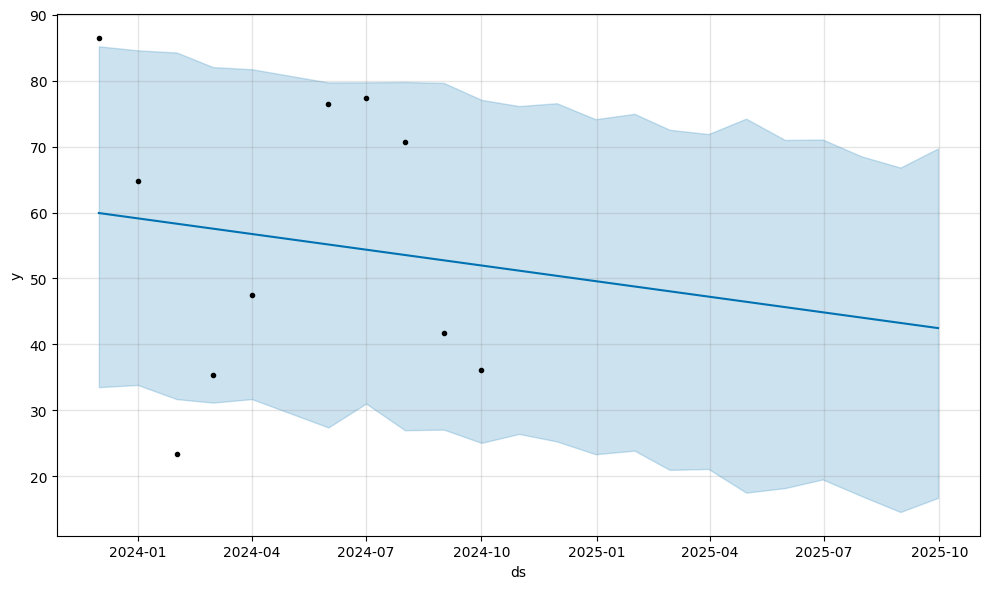

In [108]:
# Prepare revenue data
revenue_data = Transactions.groupby(Transactions["transaction_date"].dt.to_period("M"))["amount"].sum().reset_index()
revenue_data.columns = ["ds", "y"]
revenue_data["ds"] = revenue_data["ds"].dt.to_timestamp()

# Fit Prophet model
model = Prophet()
model.fit(revenue_data)

# Forecast revenue
future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)
model.plot(forecast)
plt.show()


In [109]:
merged_df.to_csv("customer_analysis_results.csv", index=False)
forecast.to_csv("revenue_forecast.csv", index=False)
